<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP_Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding


In [2]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-06-18 16:18:13--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.80.48, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.87MB/s    in 0.3s    

2020-06-18 16:18:14 (1.87 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Dropping Uncessary columns as the format for this file is weird

In [10]:
df = df.drop(["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], axis = 1)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Renaming the columns

In [12]:
df.columns = ['labels', 'data']

In [13]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Creating Binary Labels

In [18]:
df['b_labels'] = df['labels'].map({'ham':1, 'spam':0})
Y = df['b_labels'].values

In [19]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


# Splitting the data

In [22]:
df_train,df_test,Ytrain,Ytest = train_test_split(df['data'],Y, test_size = 0.33)

# Converting sentences to sequences

In [23]:
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

# Getting Words to Integer mapping

In [26]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("Found %s unique tokens." % V)

Found 7191 unique tokens.


# Padding the Sequences to get NxT Matrix. N:Sampling size, T: length

In [27]:
data_train = pad_sequences(sequences_train)
print("Shape of data train tensor:", data_train.shape)

# Get Sequence Length
T = data_train.shape[1]

Shape of data train tensor: (3733, 174)


In [28]:
# Do note that we also need the pad our test data according to our training data like 'fitting'

In [30]:
data_test = pad_sequences(sequences_test, maxlen=T)
print("Shape of data train tensor:", data_test.shape)

Shape of data train tensor: (1839, 174)


# Creating the Model

In [32]:
D = 20 # Embedding dimensionality
M = 15 # Hidden state dimensionality

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape = (T,))
x = Embedding(V+1,D)(i)
x = LSTM(M, return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
r = model.fit(data_train,Ytrain, validation_data = (data_test, Ytest), epochs =10)

Epoch 1/10
117/117 [==============================] - 8s 72ms/step - loss: 0.4634 - accuracy: 0.8599 - val_loss: 0.3793 - val_accuracy: 0.8646
Epoch 2/10
117/117 [==============================] - 8s 68ms/step - loss: 0.3209 - accuracy: 0.8666 - val_loss: 0.2528 - val_accuracy: 0.8646
Epoch 3/10
117/117 [==============================] - 8s 69ms/step - loss: 0.2028 - accuracy: 0.9025 - val_loss: 0.1666 - val_accuracy: 0.9619
Epoch 4/10
117/117 [==============================] - 8s 71ms/step - loss: 0.1294 - accuracy: 0.9794 - val_loss: 0.1200 - val_accuracy: 0.9788
Epoch 5/10
117/117 [==============================] - 8s 70ms/step - loss: 0.0876 - accuracy: 0.9885 - val_loss: 0.0929 - val_accuracy: 0.9826
Epoch 6/10
117/117 [==============================] - 8s 70ms/step - loss: 0.0595 - accuracy: 0.9922 - val_loss: 0.0766 - val_accuracy: 0.9815
Epoch 7/10
117/117 [==============================] - 8s 69ms/step - loss: 0.0432 - accuracy: 0.9941 - val_loss: 0.0692 - val_accuracy: 0.9848

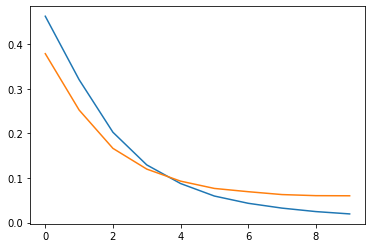

In [35]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

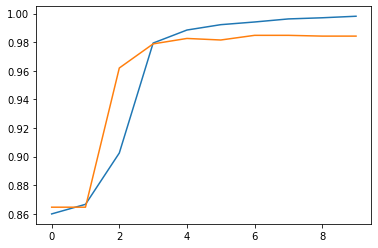

In [36]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')

In [40]:
fakenews = data_test[0]

In [43]:
fakenews.shape

(174,)

In [44]:
model.predict(fakenews)[0,0]

0.8274491